## Zaimportowanie potrzebnych bibliotek oraz plików z kodem źródłowym

In [1]:
from dataset import Dataset
from utils import split_data, plot_metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from strategies import *
from train import ActiveLearner
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.base import clone
import numpy as np
from utils import evaluate_model

## Konfiguracja hiperparametrów

In [2]:
CONFIG = {
    "initial_size": 0.005,
    "n_queries": 100,
    "query_size": 10,
    "test_size": 0.2,
}

## Wczytanie zbioru danych i podział


In [3]:
dataset = Dataset("adult")
X, y = dataset.get()

X_init, y_init, X_pool, y_pool, X_test, y_test = split_data(X, y, CONFIG["initial_size"], CONFIG["test_size"])

## Przygotownaie modeli oraz strategii

In [4]:
models_map = {
    "logistic_regression": LogisticRegression(max_iter=1000, random_state=42),
    "random_forest": RandomForestClassifier(n_estimators=100, random_state=42),
    #"svc": SVC(probability=True, kernel='rbf', random_state=42),
    "mlp": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
}

strategies_map = {
     "random": RandomSampling(),
     "least_confidence": LeastConfidence(),
     "margin": MarginSampling(),
    "entropy": EntropySampling(),
}

## Aktywne uczenie się za pomocą klasy ActiveLearner

In [5]:
results_all = []

for model_name, model in models_map.items():
    # 1. BASELINE: Train on full dataset (initial + pool)
    baseline_model = model
    X_train_full = np.vstack([X_init, X_pool])
    y_train_full = np.concatenate([y_init, y_pool])
    baseline_model.fit(X_train_full, y_train_full)
    baseline_metrics = evaluate_model(baseline_model, X_test, y_test)
    baseline_metrics["train_dataset_size"] = len(X_train_full)
    
    # 2. ACTIVE LEARNING: Different query strategies
    for strategy_name, strategy in strategies_map.items():
        print(f"Training with model: {model_name}, strategy: {strategy_name}")
        
        model_clone = model
        strategy_clone = strategy
        active_learner = ActiveLearner(model_clone, strategy_clone)
        
        results = active_learner.train(
            X_init.copy(), 
            y_init.copy(),
            X_pool.copy(),
            y_pool.copy(),
            X_test,
            y_test,
            CONFIG["n_queries"],
            CONFIG["query_size"]
        )
        
        results_all.append({
            "model": model_name,
            "strategy": strategy_name,
            "results": results,
            "baseline": baseline_metrics 
        })

Training with model: logistic_regression, strategy: random


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.04it/s]


Training with model: logistic_regression, strategy: least_confidence


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.92it/s]


Training with model: logistic_regression, strategy: margin


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.97it/s]


Training with model: logistic_regression, strategy: entropy


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.02it/s]


Training with model: random_forest, strategy: random


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.33it/s]


Training with model: random_forest, strategy: least_confidence


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.16it/s]


Training with model: random_forest, strategy: margin


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.15it/s]


Training with model: random_forest, strategy: entropy


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.15it/s]


Training with model: mlp, strategy: random


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:01<00:00,  1.82s/it]


Training with model: mlp, strategy: least_confidence


 33%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                           | 33/100 [00:37<01:58,  1.77s/it]/home/mgodniak/zum/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                 | 48/100 [01:09<02:08,  2.48s/it]/home/mgodniak/zum/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceW

Training with model: mlp, strategy: margin


 33%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                           | 33/100 [00:50<02:31,  2.26s/it]/home/mgodniak/zum/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                 | 48/100 [01:46<02:51,  3.30s/it]/home/mgodniak/zum/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceW

Training with model: mlp, strategy: entropy


 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                   | 53/100 [01:39<02:14,  2.86s/it]/home/mgodniak/zum/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                | 54/100 [01:42<02:11,  2.87s/it]/home/mgodniak/zum/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceW

Plotting f1_macro for Model: logistic_regression, Strategy: random


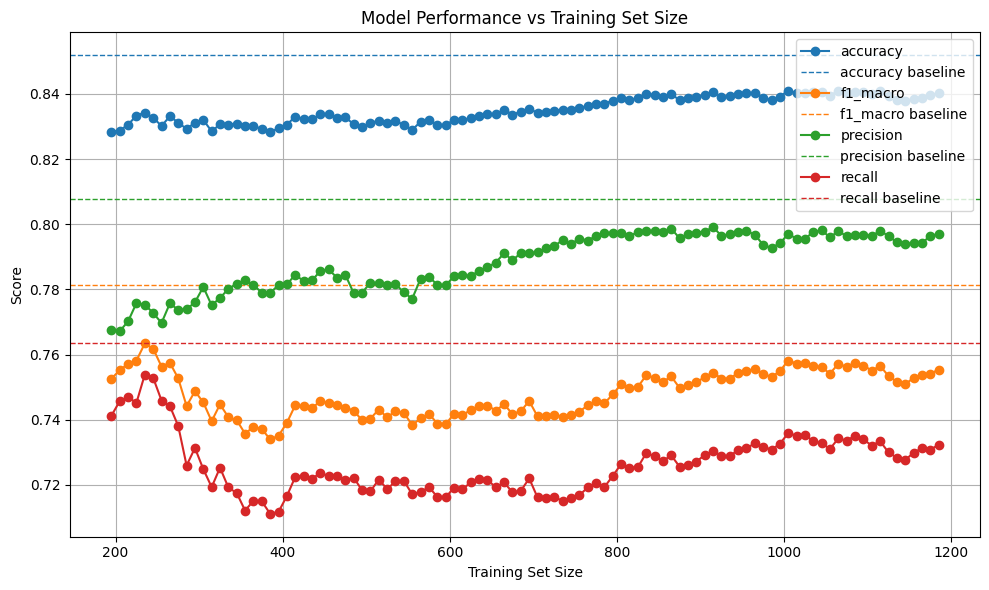

Plotting f1_macro for Model: logistic_regression, Strategy: least_confidence


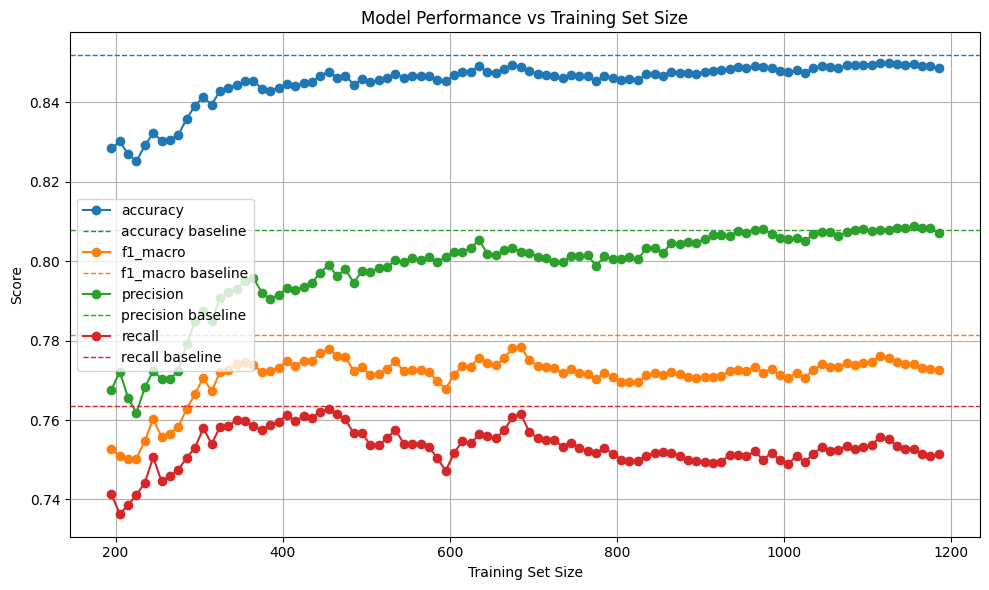

Plotting f1_macro for Model: logistic_regression, Strategy: margin


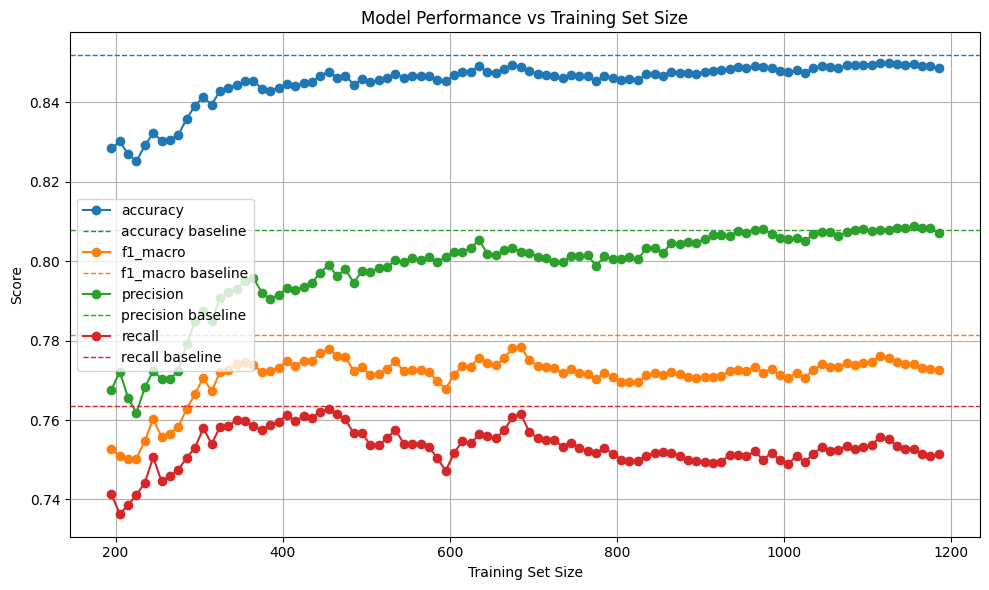

Plotting f1_macro for Model: logistic_regression, Strategy: entropy


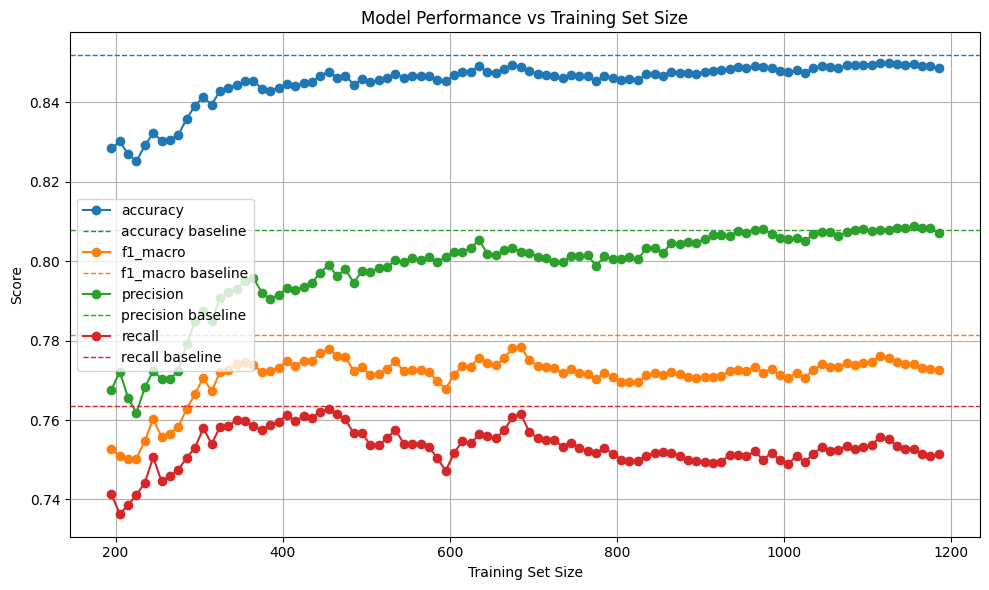

Plotting f1_macro for Model: random_forest, Strategy: random


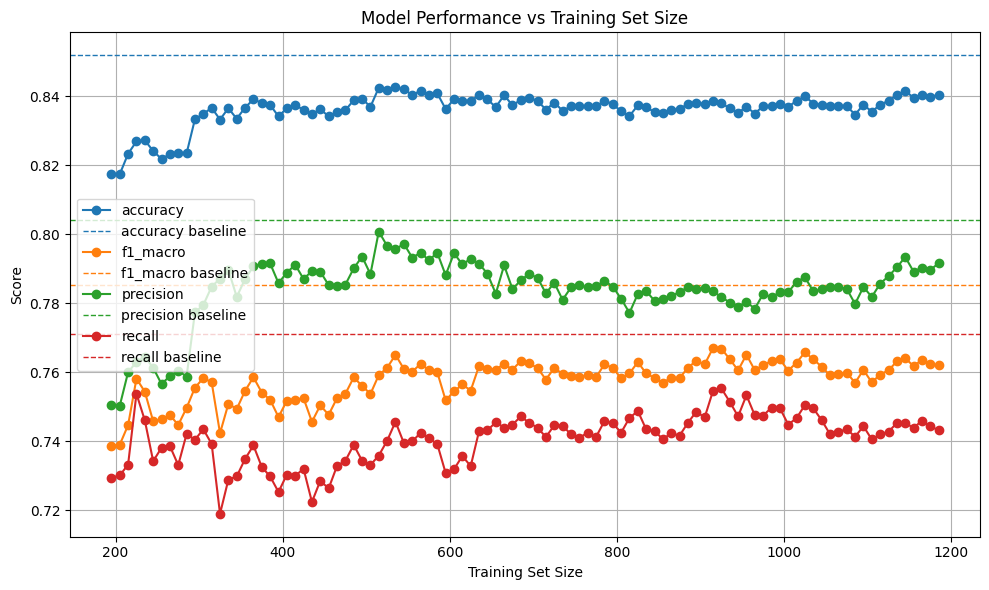

Plotting f1_macro for Model: random_forest, Strategy: least_confidence


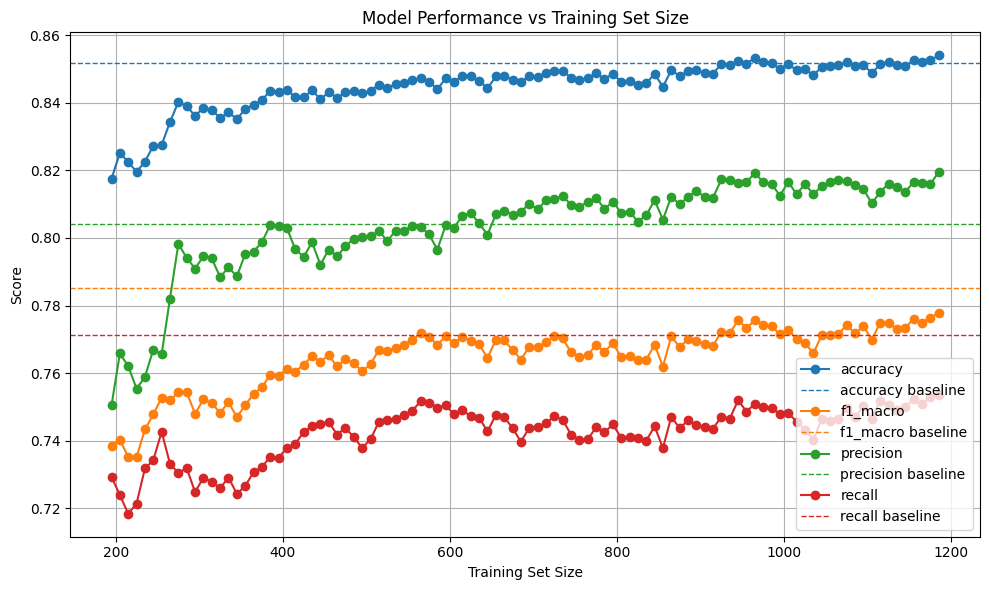

Plotting f1_macro for Model: random_forest, Strategy: margin


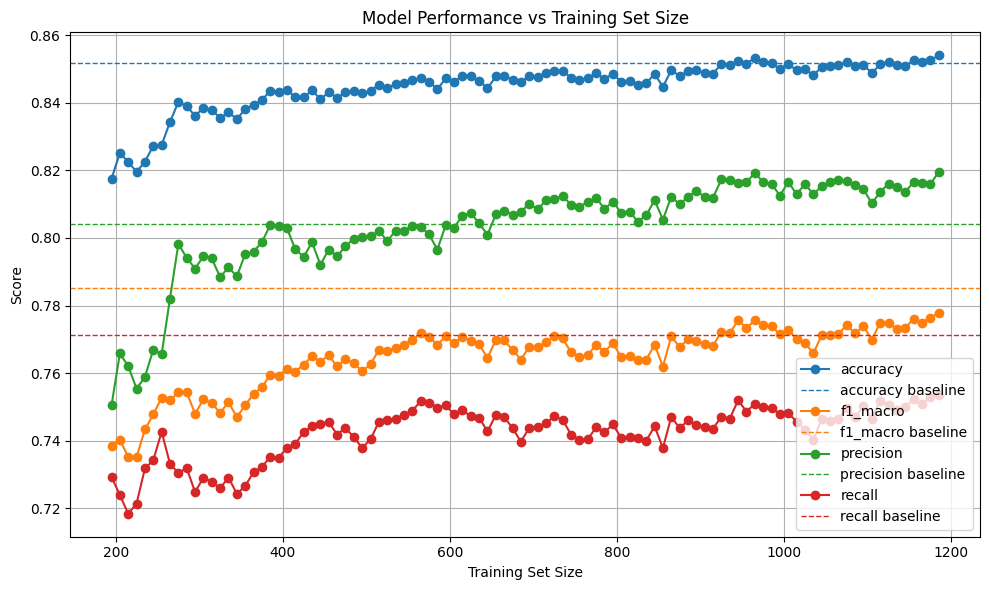

Plotting f1_macro for Model: random_forest, Strategy: entropy


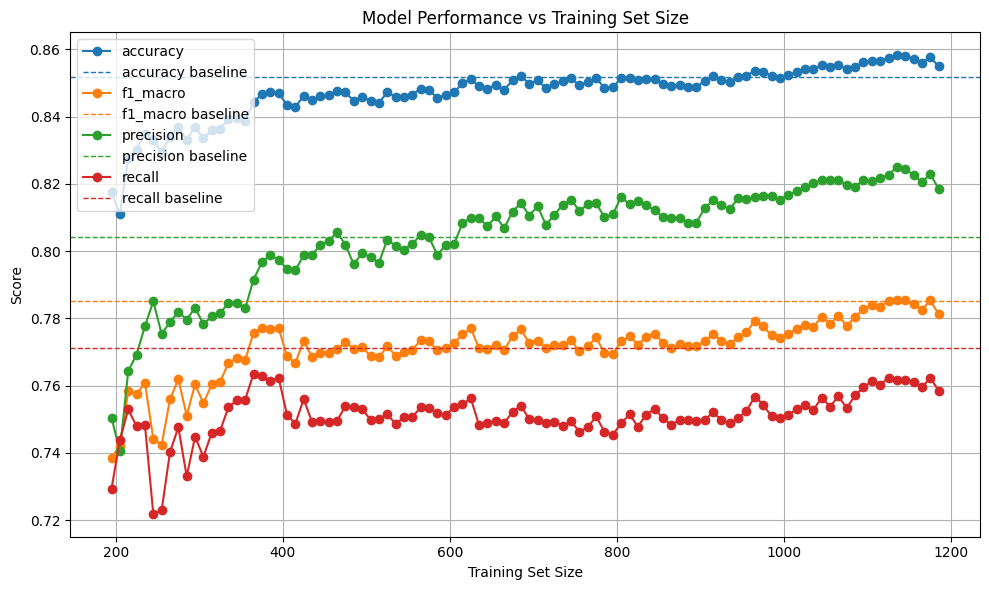

Plotting f1_macro for Model: mlp, Strategy: random


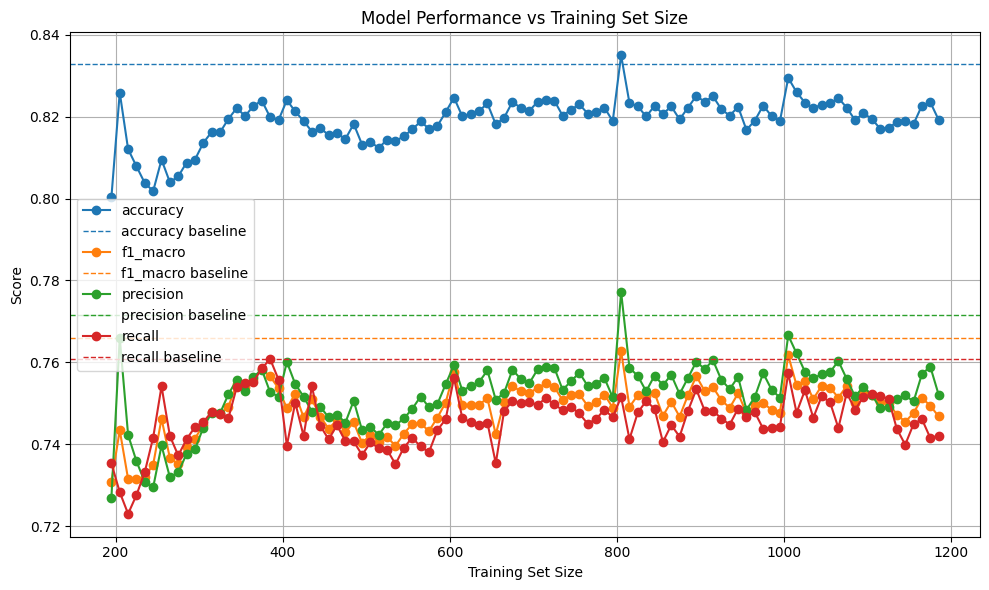

Plotting f1_macro for Model: mlp, Strategy: least_confidence


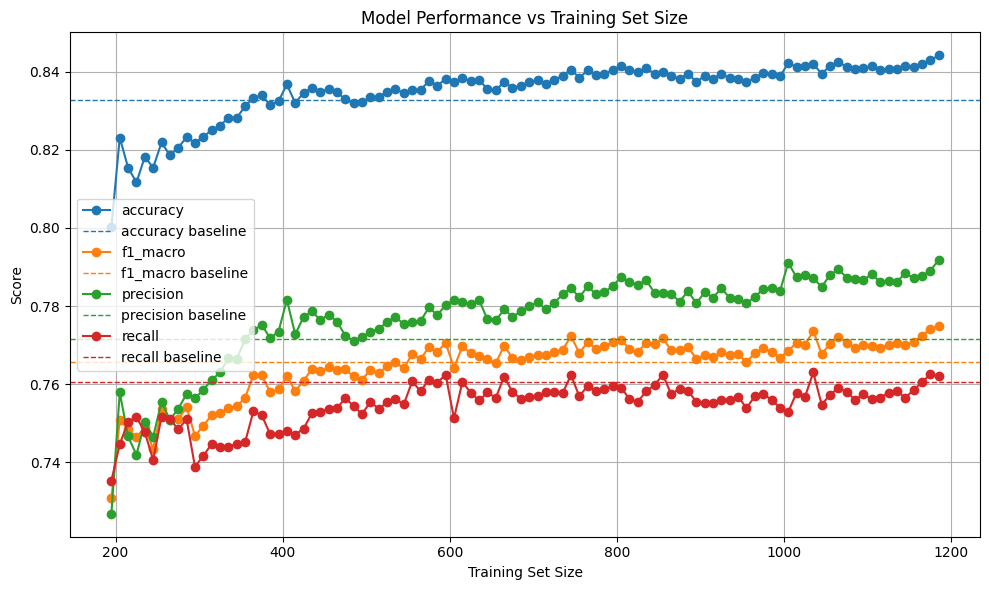

Plotting f1_macro for Model: mlp, Strategy: margin


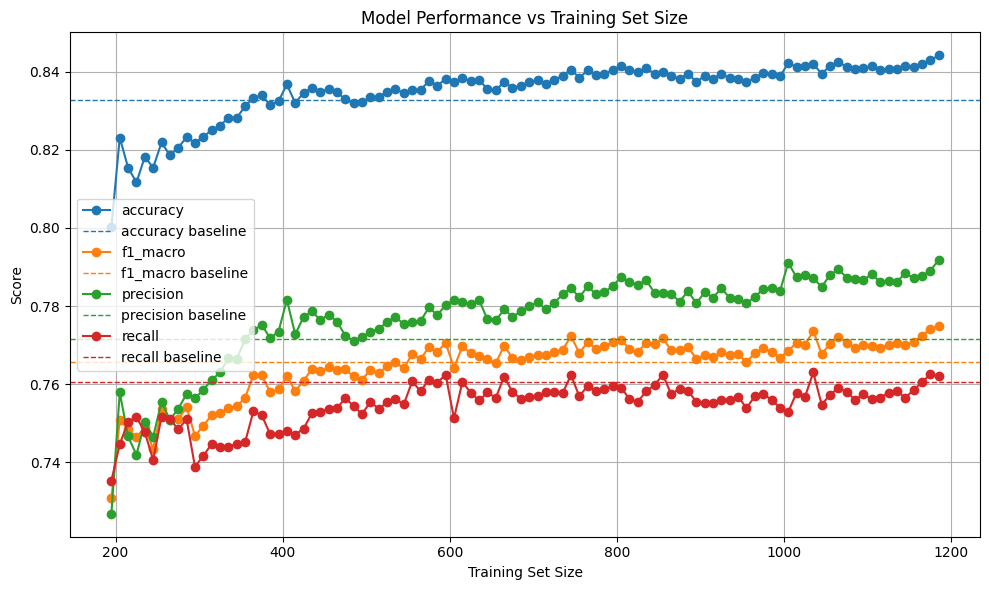

Plotting f1_macro for Model: mlp, Strategy: entropy


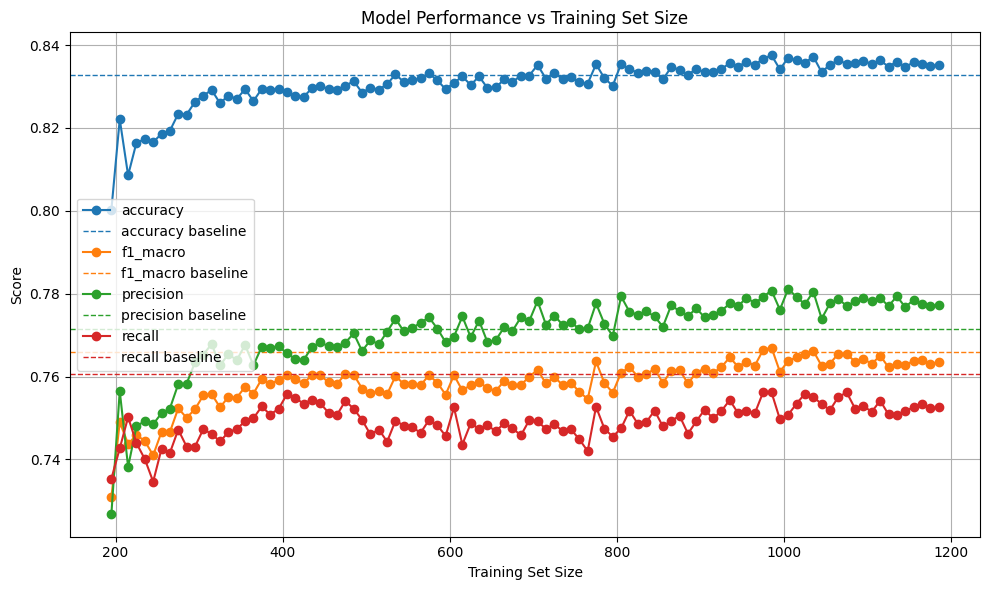

In [6]:
for run in results_all:
    model_name = run["model"]
    strategy_name = run["strategy"]
    metrics = run["results"]
    baseline_metrics = run["baseline"]
    
    print(f"Plotting f1_macro for Model: {model_name}, Strategy: {strategy_name}")
    
    plot_metrics(metrics, baseline_metrics=baseline_metrics)
